# Stay Time module demo



In [1]:
import pandas as pd
from patterns_detection_module.staytime import StayTimeModel

In [2]:
FILE_PATH = 'model.h5'
ENCODE_TYPE = 2

In [3]:
# read access control data
raw_data = pd.read_csv('test_data1.csv')
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])
raw_data.head()

,datetime,building,floor,IO,employee_ID
0,2017-01-01 07:20:47,5,1,I06,A
1,2017-01-01 10:52:52,5,1,O06,A
2,2017-01-01 11:14:00,5,1,I05,A
3,2017-01-01 16:05:37,5,1,O06,A
4,2017-01-01 16:27:10,5,1,I05,A


In [4]:
# create staytime model
staytime_model = StayTimeModel(encode_type=ENCODE_TYPE)
# encode raw data into [previous staytime, staytime, time of day]
encode_data, data = staytime_model.data_encoding(raw_data)
print('encode_data',encode_data[:5])
data.head()

encode_data [[12725.  1268. 40440.]
 [17497.  1293. 59230.]
 [11516. 41745. 26091.]
 [13347.   868. 40306.]
 [17767.  1428. 59501.]]


,datetime,building,floor,IO,employee_ID,staytime,pre_staytime,time
0,2017-01-01 07:20:47,5,1,I06,A,NaN,NaN,26447.0
1,2017-01-01 10:52:52,5,1,O06,A,12725.0,NaN,39172.0
2,2017-01-01 11:14:00,5,1,I05,A,1268.0,12725.0,40440.0
3,2017-01-01 16:05:37,5,1,O06,A,17497.0,1268.0,57937.0
4,2017-01-01 16:27:10,5,1,I05,A,1293.0,17497.0,59230.0


In [5]:
# using modified K-mean clustering
staytime_model.fit(data=encode_data)
# save each group info.
staytime_model.save_model(FILE_PATH)
# load pre-trained group info.
staytime_model.load_model(FILE_PATH)
# predicted access control is out of patterns
y_pred, labels = staytime_model.predict(data=encode_data)
print('y_pred',y_pred[:5])
print('labels',labels[:5])


C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\scipy\stats\morestats.py:1780: RuntimeWarning: invalid value encountered in true_divide
  w = (y - xbar) / s
C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\scipy\stats\_distn_infrastructure.py:1869: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\danie\Anaconda3\envs\Access_control_patterns_detection\lib\site-packages\scipy\stats\_distn_infrastructure.py:1957: RuntimeWarning: invalid value encountered in less_equal
  cond2 = c

y_pred [1 1 1 1 1]
labels [ 6 12 18  6 12]


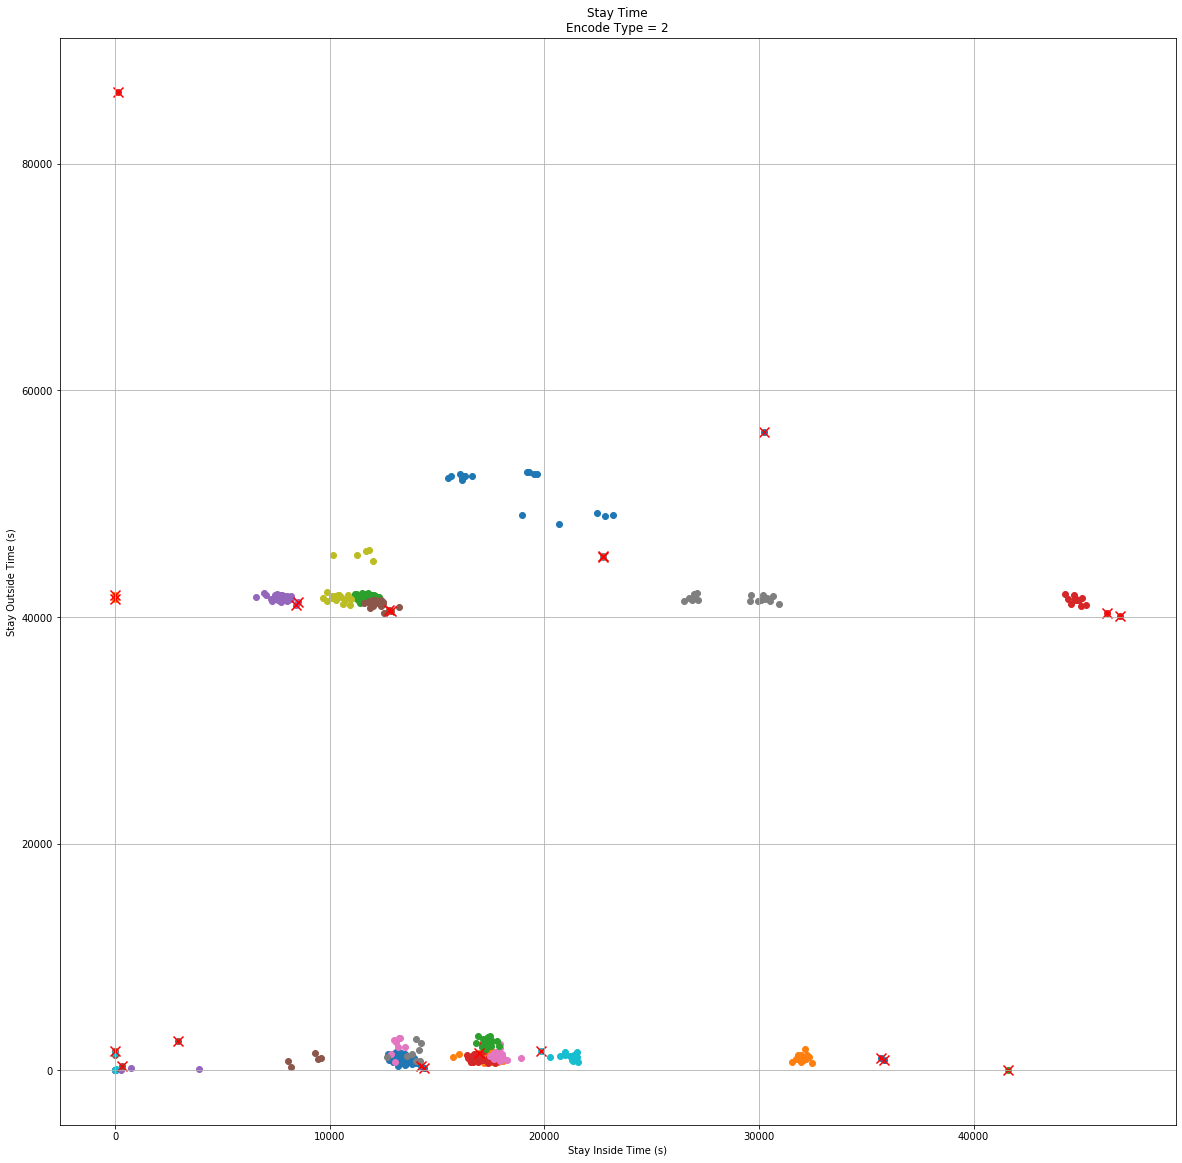

In [6]:
# access control pattern visualisation
staytime_model.plot_output(encode_data, center_verbose=False)



In [7]:
# output abnormal data to csv file
staytime_model.to_csv('output.csv', data, encode_data, y_pred)



In [8]:
pd.read_csv('output.csv',index_col=[0]).head(6)


,datetime,building,floor,IO,employee_ID,staytime,SN
37,2017-01-12 17:10:45.000,5,1,O08,A,35667.0,0
38,2017-01-12 17:29:30.000,5,1,I05,A,1125.0,1
109,2017-01-29 10:55:56.000,5,1,O05,A,3.0,0
110,2017-01-29 11:23:49.000,5,1,I06,A,1673.0,1
134,2017-02-02 19:50:43.000,5,1,O05,A,8445.0,0
135,2017-02-05 07:14:54.000,5,1,I06,A,41051.0,1
